In [41]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [42]:
data = pd.read_csv("salesforcourse-4fe2kehu.csv", index_col='index')

In [43]:
print(data.head(4))
print(data.shape)

            Date    Year     Month  Customer_Age Customer_Gender  \
index                                                              
0      2/19/2016  2016.0  February          29.0               F   
1      2/20/2016  2016.0  February          29.0               F   
2      2/27/2016  2016.0  February          29.0               F   
3      3/12/2016  2016.0     March          29.0               F   

             Country       State Product_Category     Sub_Category  Quantity  \
index                                                                          
0      United States  Washington      Accessories  Tires and Tubes       1.0   
1      United States  Washington         Clothing           Gloves       2.0   
2      United States  Washington      Accessories  Tires and Tubes       3.0   
3      United States  Washington      Accessories  Tires and Tubes       2.0   

       Unit_Cost  Unit_Price   Cost  Revenue  
index                                         
0          80.00

DATE - is d/m/y
year - is year
Month - is month
Customer age - age of purchaser
Customer Gender - iss male or female
Country - where customer is
State - from which state he is
Prod Category - type of product
Sub Category - type of sub product
Quantity -
unit cost
unit price
cost
revenue

In [44]:
data = data.dropna()
print(data.isnull().sum())
print(data.describe())
print(data.info())

Date                0
Year                0
Month               0
Customer_Age        0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Quantity            0
Unit_Cost           0
Unit_Price          0
Cost                0
Revenue             0
dtype: int64
               Year  Customer_Age      Quantity     Unit_Cost    Unit_Price  \
count  34866.000000  34866.000000  34866.000000  34866.000000  34866.000000   
mean    2015.569237     36.382895      2.002524    349.880567    389.232485   
std        0.495190     11.112902      0.813936    490.015846    525.319091   
min     2015.000000     17.000000      1.000000      0.670000      0.666667   
25%     2015.000000     28.000000      1.000000     45.000000     53.666667   
50%     2016.000000     35.000000      2.000000    150.000000    179.000000   
75%     2016.000000     44.000000      3.000000    455.000000    521.000000   
max     2016.000000     87.000000      3.000000

In [45]:
data['Date'] = pd.to_datetime(data.Date)

data['Month'] = pd.factorize(data.Month)[0]
data['Customer_Gender'] = pd.factorize(data.Customer_Gender)[0]
data['Country'] = pd.factorize(data.Country)[0]
data['State'] = pd.factorize(data.State)[0]
data['Sub_Category'] = pd.factorize(data.Sub_Category)[0]

/var/folders/lk/p4rmv9cx45d_zk5h2j11pwl40000gn/T/ipykernel_29319/397504601.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



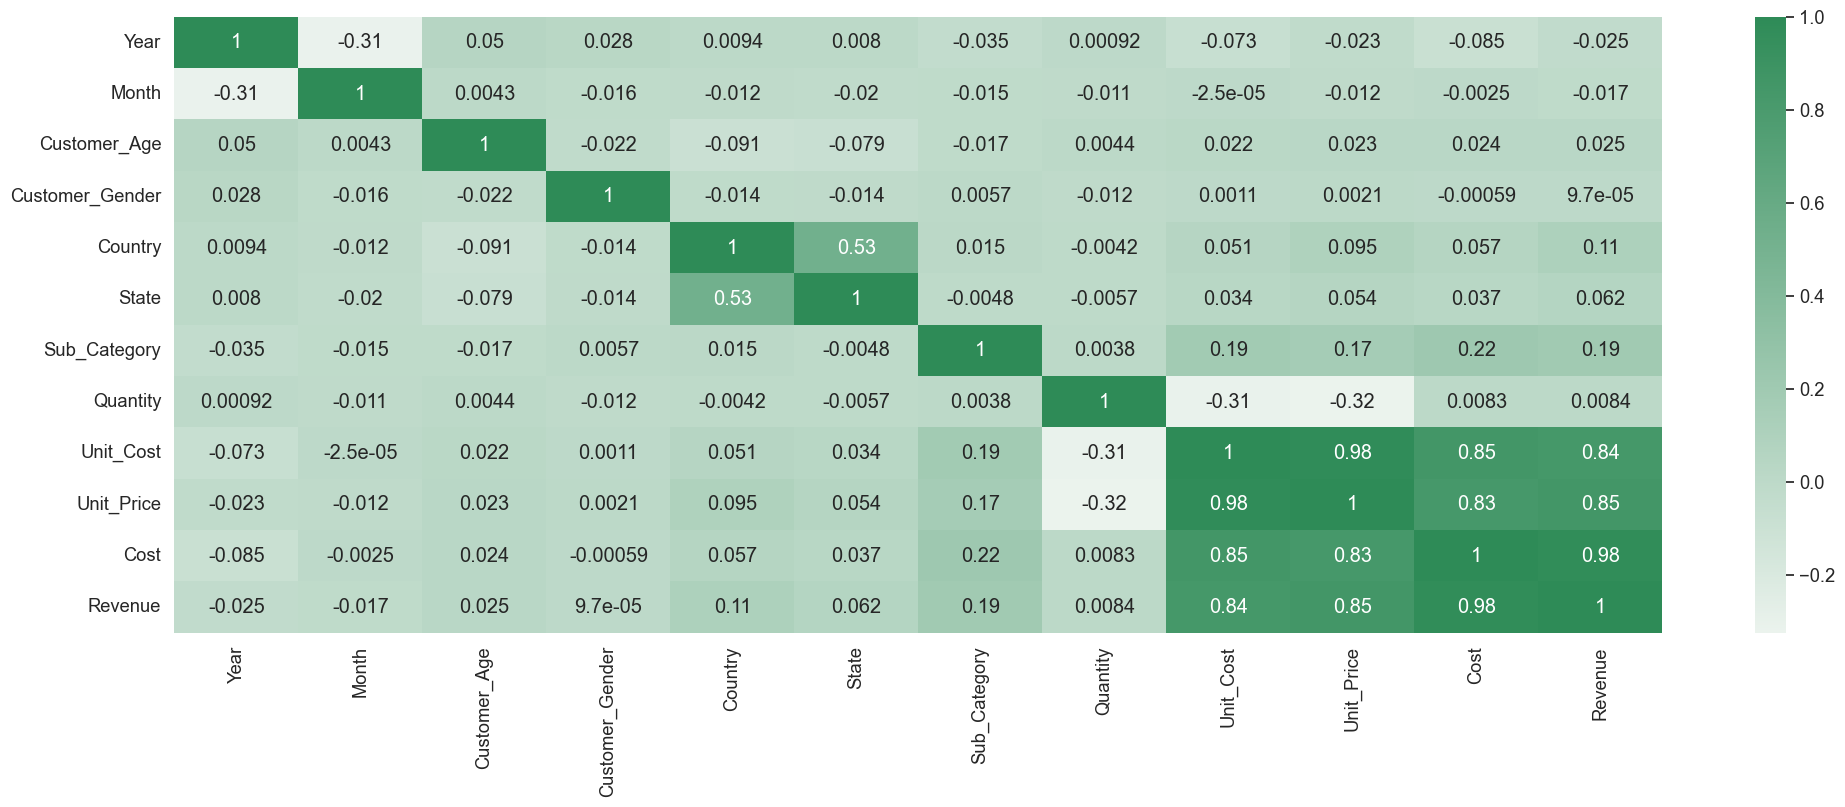

In [46]:
# Correlation between variables

cor = data.corr()
clrmap = sns.light_palette("seagreen", reverse=False, as_cmap=True)

sns.heatmap(cor,xticklabels=cor.columns,yticklabels=cor.columns, cmap=clrmap, annot=True)
sns.set(rc={'figure.figsize':(24,8)},font_scale=1.2)

In [47]:
data.head()

,Date,Year,Month,Customer_Age,Customer_Gender,Country,State,Product_Category,Sub_Category,Quantity,Unit_Cost,Unit_Price,Cost,Revenue
index,,,,,,,,,,,,,,
0,2016-02-19,2016.0,0,29.0,0,0,0,Accessories,0,1.0,80.00,109.000000,80.0,109.0
1,2016-02-20,2016.0,0,29.0,0,0,0,Clothing,1,2.0,24.50,28.500000,49.0,57.0
2,2016-02-27,2016.0,0,29.0,0,0,0,Accessories,0,3.0,3.67,5.000000,11.0,15.0
3,2016-03-12,2016.0,1,29.0,0,0,0,Accessories,0,2.0,87.50,116.500000,175.0,233.0
4,2016-03-12,2016.0,1,29.0,0,0,0,Accessories,0,3.0,35.00,41.666667,105.0,125.0


In [48]:
import plotly.express as px

fig = px.histogram(data,x='Revenue', color='Product_Category')
fig.show()

In [49]:
import plotly.express as px

fig = px.pie(data, values='Unit_Price', names='Product_Category')
fig.show()

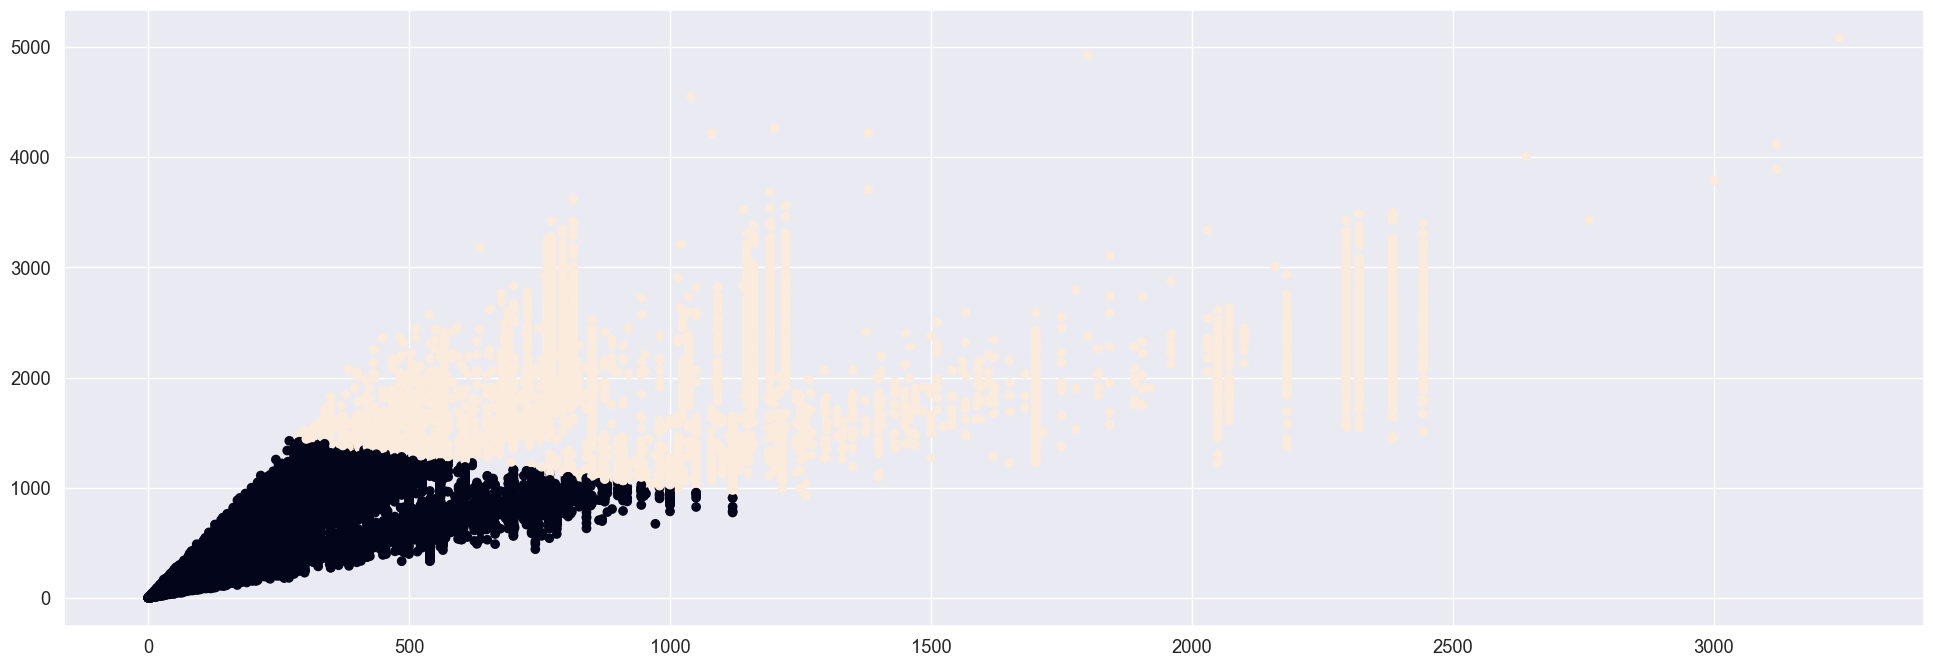

In [50]:
from sklearn.cluster import KMeans

x = data['Unit_Cost']
y = data['Revenue']

data = list(zip(x, y))

kmeans = KMeans(n_clusters=2)
kmeans.fit(data)

plt.scatter(x, y, c=kmeans.labels_)
plt.show()